In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

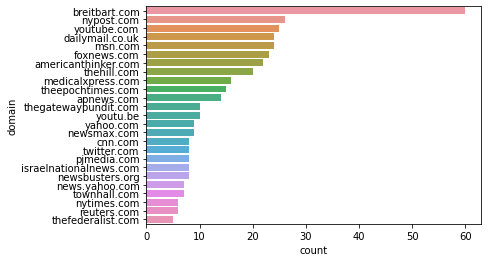

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

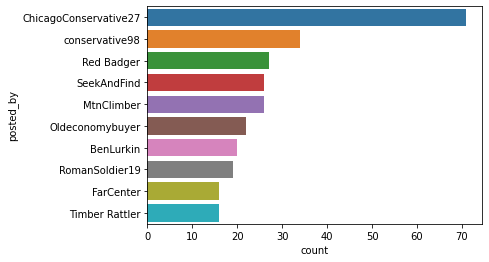

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain                              \
                                           count unique                  top   
domain              posted_by                                                  
americanthinker.com MtnClimber                14      1  americanthinker.com   
                    SeekAndFind                2      1  americanthinker.com   
apnews.com          Oldeconomybuyer            6      1           apnews.com   
                    Timber Rattler             2      1           apnews.com   
breitbart.com       ChicagoConservative27     44      1        breitbart.com   
                    conservative98             7      1        breitbart.com   
cnn.com             Timber Rattler             1      1              cnn.com   
                    ChicagoConservative27      3      1              cnn.com   
                    BenLurkin                  1      1              cnn.com   
dailymail.co.uk     Timber Rattler             1      1      dailymail.co.uk   
foxnews.com         Oldeconomybuyer            1      1          foxnews.com   
                    ChicagoConservative27      2      1          foxnews.com   
                    conservative98             4      1          foxnews.com   
msn.com             Oldeconomybuyer            1      1              msn.com   
                    RomanSoldier19             6      1              msn.com   
news.yahoo.com      Oldeconomybuyer            1      1       news.yahoo.com   
                    RomanSoldier19             2      1       news.yahoo.com   
newsmax.com         conservative98             2      1          newsmax.com   
nypost.com          Oldeconomybuyer            1      1           nypost.com   
                    ChicagoConservative27      4      1           nypost.com   
                    conservative98             5      1           nypost.com   
                    BenLurkin                  1      1           nypost.com   
                    RomanSoldier19             1      1           nypost.com   
                    Red Badger                 1      1           nypost.com   
nytimes.com         Timber Rattler             1      1          nytimes.com   
pjmedia.com         SeekAndFind                7      1          pjmedia.com   
reuters.com         Timber Rattler             1      1          reuters.com   
theepochtimes.com   SeekAndFind                2      1    theepochtimes.com   
                    RomanSoldier19             1      1    theepochtimes.com   
                    Red Badger                 1      1    theepochtimes.com   
thefederalist.com   SeekAndFind                2      1    thefederalist.com   
                    Red Badger                 1      1    thefederalist.com   
thehill.com         ChicagoConservative27     15      1          thehill.com   
                    conservative98             1      1          thehill.com   
townhall.com        MtnClimber                 1      1         townhall.com   
                    conservative98             1      1         townhall.com   
twitter.com         conservative98             3      1          twitter.com   
yahoo.com           SeekAndFind                1      1            yahoo.com   
                    BenLurkin                  1      1            yahoo.com   
                    RomanSoldier19             1      1            yahoo.com   
youtube.com         MtnClimber                 1      1          youtube.com   
                    conservative98             4      1          youtube.com   

                                                
                                          freq  
domain              posted_by                   
americanthinker.com MtnClimber              14  
                    SeekAndFind              2  
apnews.com          Oldeconomybuyer          6  
                    Timber Rattler           2  
breitbart.com       ChicagoConservative27   44  
                    conservative98           7  


In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
